In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("economic_index.csv")

In [7]:
 df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [47]:
df.drop(df.columns[0], axis = 1, inplace=True);

In [49]:
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [61]:
df.drop(columns=["year","month"],axis=1,inplace=True)

In [63]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [65]:
#checking null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [67]:
import seaborn as sns

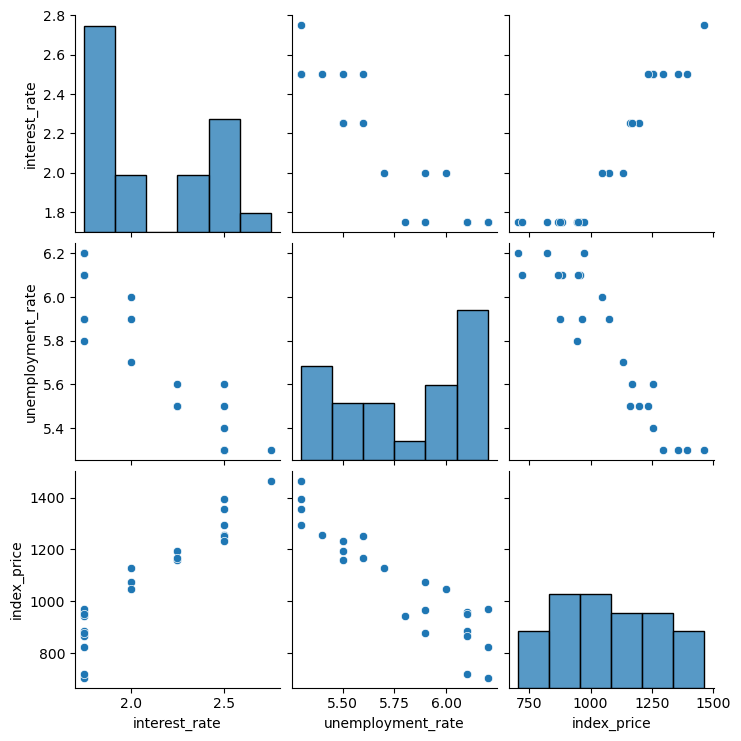

In [69]:
sns.pairplot(df)

In [71]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


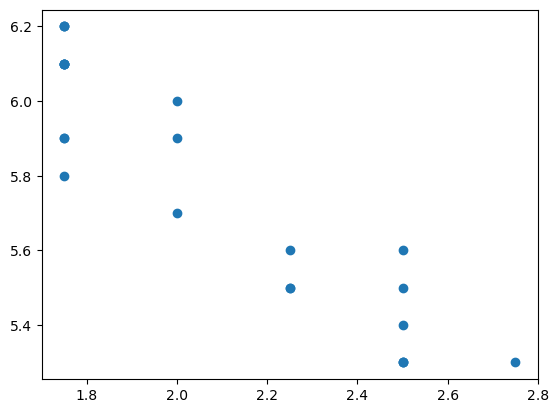

In [101]:
#visualize data points 
plt.scatter(df['interest_rate'], df['unemployment_rate'])
plt.xlabel = ("interest_rate")
plt.ylabel = ("unemployment_rate")
plt.show()

In [97]:
X= df.iloc[:,:-1]

In [95]:
y = df.iloc[:,-1]

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size = 0.25 , random_state= 42 )

<Axes: xlabel='interest_rate', ylabel='index_price'>

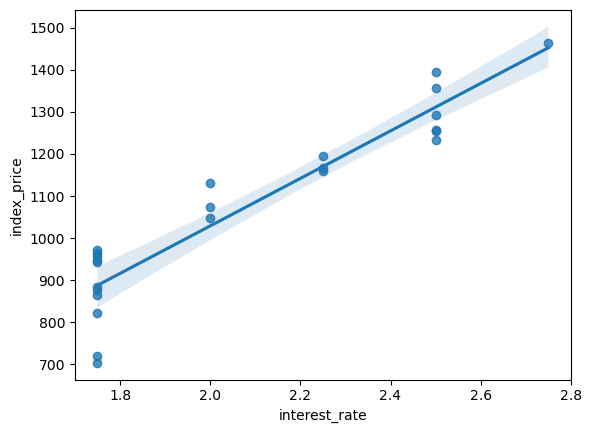

In [119]:
sns.regplot(x = 'interest_rate', y = 'index_price' , data = df)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

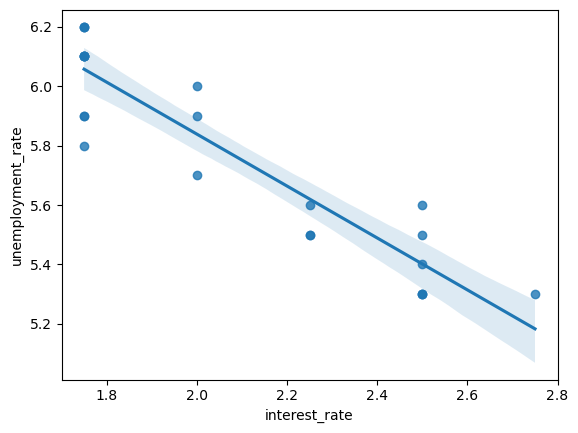

In [121]:
sns.regplot(x = 'interest_rate', y = 'unemployment_rate' , data = df)

In [123]:
#standardization
from sklearn.preprocessing import StandardScaler

In [173]:
print(type(X_test))
print(X_test[:5])


<class 'sklearn.preprocessing._data.StandardScaler'>


TypeError: 'StandardScaler' object is not subscriptable

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


In [177]:
print(type(X_test))
print(X_test[:5])


<class 'numpy.ndarray'>
[[ 0.57346234 -0.8615569 ]
 [-0.90115511  1.30956648]
 [ 2.0480798  -1.48187786]
 [-0.90115511  0.999406  ]
 [-0.16384638  0.37908503]]


In [129]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [159]:
X_train.shape

(18, 2)

In [133]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [135]:
regression.fit(X_train, y_train);

In [149]:
from sklearn.model_selection import cross_val_score
validation = cross_val_score(regression,X_train,y_train,scoring = "neg_mean_squared_error",cv=3)

In [151]:
np.mean(validation)

-5914.828180162396

In [179]:
y_pred = regression.predict(X_test)

In [183]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.76288771258
59.93578152323556
76.11677139574813


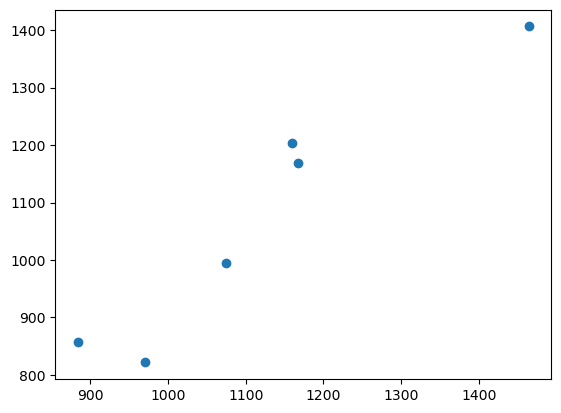

In [185]:
plt.scatter(y_test,y_pred)
